# Music Genre Classificator
### IP02 - Machine Learning in Pyhton 
Diana Patricia García Fernández - 93662 |
                Karla Lisette Antonio Perez - 93630 |
                Dante Antonio Garcia Rosales - 93351 |
                Fransico Abreu Gonçalves - 93760 |
                Pedro Henrique Pedran Dos Santos - 93842 |
                Patricio Molano  -

In [156]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [157]:
# Loading data set
song_data = pd.read_csv('../data/songs_data.csv')

In [158]:
# Displaying the data, to visualize the how the parameters work 
song_data.head(n = 5)

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.70000,0.0974,0.641,125.000,248036
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.00000,0.0782,0.885,144.684,168160
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.04070,0.6110,0.439,99.993,271238
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.01040,0.3850,0.205,157.970,173347
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.00239,0.1700,0.382,162.721,168440


## Exploratory Data Analysis (EDA)

#### Dataset size

In [159]:
#Displaying number of rows and columns
print("Number of rows: ",song_data.shape[0])
print("Number of columns: ",song_data.shape[1])

Number of rows:  28396
Number of columns:  17


In [160]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

* Each parameter has 28396 data (no data missing), with the only exception in track_name and track_artist (28392) that have 4 data missing. But it does not matter for our purpose

### Describing the dataset

In [161]:
song_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


PARAMETERS:
- Danceability (0-1): 0 ist least danceable and 1 most danceable
- Energy (0-1): 0 less energy, 1 more energy, intensity, activity
- Key (Pitch class notation), c=0, 1=c#Db, 2=D...., 11 keys in total. -1 is No key
- Loudness(dB): average loudness across the entire track. values tipycal [-60 0]
- Mode(major or minor): major =1, minor=0
- Speechiness: detects the presence of spoken words in a track. the more speech = 1, 0.66 <= entirely spoken words, 0.33=> non-speech tracks, in between 
- Acoustieness(0-1): 1 = high confidence the track is acoustic
- Instrumentalness: the closer is to 1, the grater likelihood the track contains no vocal content. 0.5<=are intended to represent instrumental traks.
- Liveness: higher liveness, increased probability that the track was recorded live. 0.8<= strong likelihood that the track is live
- Valence(0-1): tracks with high valance sound more happy 
- Tempo(Beats per minute)
- Duration_ms (miliiseconds)

OBSERVATIONS:
- All the parameters are qualitative type, but put into a scale to describe the attributes. The only data that has units and is quantitative is Loudness (dB), Tempo (BPM) and duration_ms (ms)
- Loudness of our data [-46.448, 1.27], and typical values goes from [-60 0]. So the audio that is bigger than 0 or is an outliner o was "clipped" because in digital audio this is not possible. Either way, we have to normalize this parameter or threat them as ourlitners and dismiss them, or just convert it to 0dB
- It was decided that "liveness", "mode" and "duration_ms" is not a parameter we should use, it is not related with genre
- All the songs has key, in other words, there is no "-1" in the key column

### Table of average parameters for each genre

In [162]:
# Data Validation
subss = song_data.drop(['track_id','track_name','track_artist','track_popularity','liveness','mode','duration_ms'], axis = 1)  #dataframe with just numerical values and genre

EDM = subss[subss["genre"] == "edm"]
ROCK = subss[subss["genre"] == "rock"]
RAP = subss[subss["genre"] == "rap"]
LATIN = subss[subss["genre"] == "latin"]
RNB = subss[subss["genre"] == "r&b"]
POP = subss[subss["genre"] == "pop"]

mean_summary = pd.DataFrame({
    'EDM': EDM.describe().loc['mean'],
    'ROCK': ROCK.describe().loc['mean'],
    'RAP': RAP.describe().loc['mean'],
    'LATIN': LATIN.describe().loc['mean'],
    'RNB': RNB.describe().loc['mean'],
    'POP': POP.describe().loc['mean']
})
mean_summary

,EDM,ROCK,RAP,LATIN,RNB,POP
danceability,0.657675,0.518599,0.716019,0.711032,0.667465,0.637648
energy,0.809599,0.732942,0.649966,0.710556,0.589056,0.700940
key,5.355064,5.254174,5.431449,5.469580,5.381238,5.316936
loudness,-5.487558,-7.562313,-7.087460,-6.480431,-8.031843,-6.377415
speechiness,0.087976,0.057947,0.197466,0.100411,0.115639,0.074171
acousticness,0.077026,0.147625,0.196493,0.212494,0.264144,0.172402
instrumentalness,0.244743,0.066583,0.080089,0.052556,0.028499,0.063680
valence,0.397494,0.532581,0.505351,0.607292,0.537971,0.502188
tempo,126.328434,125.060102,120.549530,118.527269,113.929145,120.960428


In [163]:
print("Highest danceability: ",mean_summary.loc['danceability'].idxmax(), ' with ', round(mean_summary.loc['danceability'].max(),5))
print("Lowest danceability: ",mean_summary.loc['danceability'].idxmin(), ' with ', round(mean_summary.loc['danceability'].min(),5))
print('\n')
print("Highest energy: ",mean_summary.loc['energy'].idxmax(), ' with ', round(mean_summary.loc['energy'].max(),5))
print("Lowest energy: ",mean_summary.loc['energy'].idxmin(), ' with ', round(mean_summary.loc['energy'].min(),5))
print('\n')
print("Highest key : ",mean_summary.loc['key'].idxmax(), ' with ', round(mean_summary.loc['key'].max(),5))
print("Lowest key : ",mean_summary.loc['key'].idxmin(), ' with ', round(mean_summary.loc['key'].min(),5))
print('\n')
print("Highest loudness : ",mean_summary.loc['loudness'].idxmax(), ' with ', round(mean_summary.loc['loudness'].max(),5))
print("Lowest loudness : ",mean_summary.loc['loudness'].idxmin(), ' with ', round(mean_summary.loc['loudness'].min(),5))
print('\n')
print("Highest speechiness : ",mean_summary.loc['speechiness'].idxmax(), ' with ', round(mean_summary.loc['speechiness'].max(),5))
print("Lowest speechiness : ",mean_summary.loc['speechiness'].idxmin(), ' with ', round(mean_summary.loc['speechiness'].min(),5))
print('\n')
print("Highest acousticness : ",mean_summary.loc['acousticness'].idxmax(), ' with ', round(mean_summary.loc['acousticness'].max(),5))
print("Lowest acousticness : ",mean_summary.loc['acousticness'].idxmin(), ' with ', round(mean_summary.loc['acousticness'].min(),5))
print('\n')
print("Highest instrumentalness: ",mean_summary.loc['danceability'].idxmax(), ' with ', round(mean_summary.loc['instrumentalness'].max(),5))
print("Lowest instrumentalness: ",mean_summary.loc['instrumentalness'].idxmin(), ' with ', round(mean_summary.loc['instrumentalness'].min(),5))
print('\n')
print("Highest valence: ",mean_summary.loc['valence'].idxmax(), ' with ', round(mean_summary.loc['valence'].max(),5))
print("Lowest valence: ",mean_summary.loc['valence'].idxmin(), ' with ', round(mean_summary.loc['valence'].min(),5))
print('\n')
print("Highest tempo: ",mean_summary.loc['tempo'].idxmax(), ' with ', round(mean_summary.loc['tempo'].max(),5))
print("Lowest tempo: ",mean_summary.loc['tempo'].idxmin(), ' with ', round(mean_summary.loc['tempo'].min(),5))

Highest danceability:  RAP  with  0.71602
Lowest danceability:  ROCK  with  0.5186


Highest energy:  EDM  with  0.8096
Lowest energy:  RNB  with  0.58906


Highest key :  LATIN  with  5.46958
Lowest key :  ROCK  with  5.25417


Highest loudness :  EDM  with  -5.48756
Lowest loudness :  RNB  with  -8.03184


Highest speechiness :  RAP  with  0.19747
Lowest speechiness :  ROCK  with  0.05795


Highest acousticness :  RNB  with  0.26414
Lowest acousticness :  EDM  with  0.07703


Highest instrumentalness:  RAP  with  0.24474
Lowest instrumentalness:  RNB  with  0.0285


Highest valence:  LATIN  with  0.60729
Lowest valence:  EDM  with  0.39749


Highest tempo:  EDM  with  126.32843
Lowest tempo:  RNB  with  113.92915


### Distribution graphs per parameter vs genre

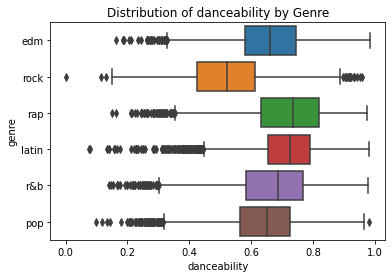

In [164]:
sns.boxplot(x='danceability', y='genre', data=song_data)
plt.title('Distribution of danceability by Genre')
plt.show()

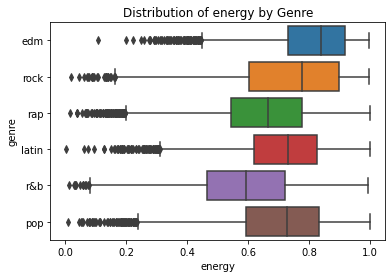

In [165]:
sns.boxplot(x='energy', y='genre', data=song_data)
plt.title('Distribution of energy by Genre')
plt.show()

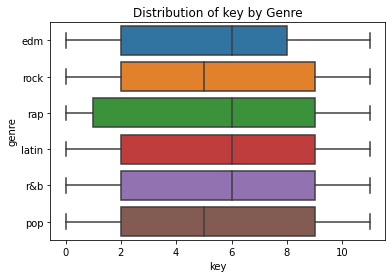

In [166]:
sns.boxplot(x='key', y='genre', data=song_data)
plt.title('Distribution of key by Genre')
plt.show()

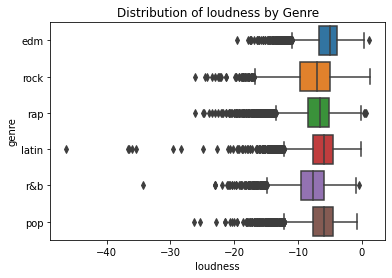

In [167]:
sns.boxplot(x='loudness', y='genre', data=song_data)
plt.title('Distribution of loudness by Genre')
plt.show()

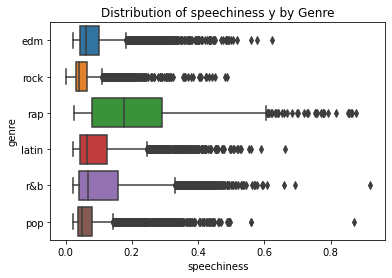

In [168]:
sns.boxplot(x='speechiness', y='genre', data=song_data)
plt.title('Distribution of speechiness y by Genre')
plt.show()

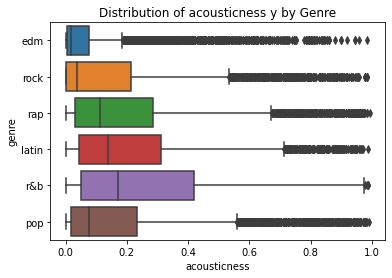

In [169]:
sns.boxplot(x='acousticness', y='genre', data=song_data)
plt.title('Distribution of acousticness y by Genre')
plt.show()

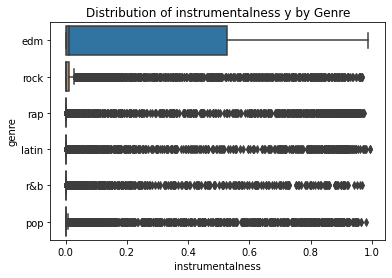

In [170]:
sns.boxplot(x='instrumentalness', y='genre', data=song_data)
plt.title('Distribution of instrumentalness y by Genre')
plt.show()

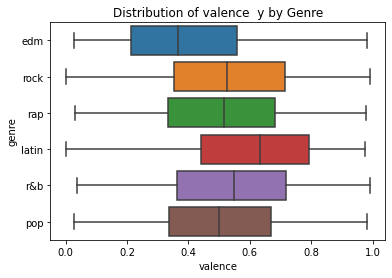

In [171]:
sns.boxplot(x='valence', y='genre', data=song_data)
plt.title('Distribution of valence  y by Genre')
plt.show()

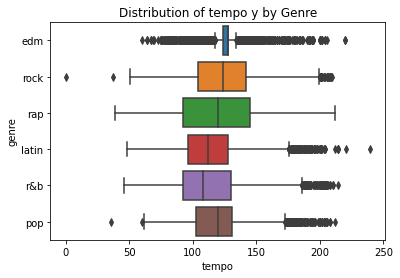

In [172]:
sns.boxplot(x='tempo', y='genre', data=song_data)
plt.title('Distribution of tempo y by Genre')
plt.show()

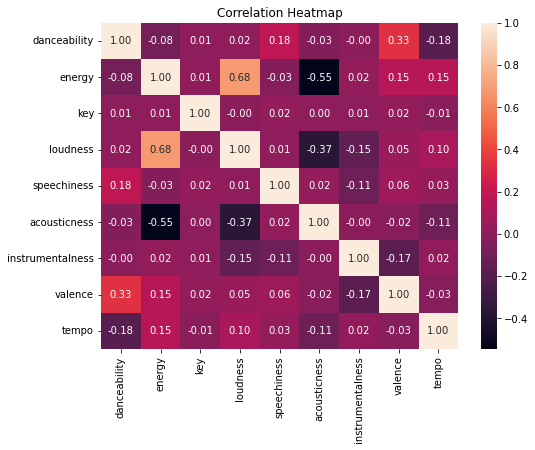

In [173]:
# Correrlation matrix
# First, drop the parameters that are not numerical
X =subss.drop('genre', axis = 1)
#corr_matrix = X.corr()
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Conclusion of the EDA

- Valance and danceability are related (the more happy is the song, the more danceability)
- The more energy, less chance to be an acoustic song
- strong relation with energy and loudness, therefore there is also a relation with loudness and acousticness
- Danceability is considered important to find rock songs due its low value
- Energy is important to find edm songs (highest value) and rnb songs (lowest value)
- Key, most of the genre share similar keys, so maybe we could analyze more its importance. rock and pop avr. have lower keys
- Loudness can be useful to find edm and rnb songs
- speechiness is important to find rap songs, and rnb songs
- acousticnes is important for rnb songs and edm songs
- instrummentalness can be important for edm music
- Valence is important for latin and edm
- tempo, it is importan for edm, and also rap/rnb maybe

## Data Preparation

#### Standarization

In [174]:
X = subss.drop('genre', axis= 1) # Features
y = subss['genre'] # Target

In [175]:
X.shape

(28396, 9)

In [176]:
# Importing the scaler

from sklearn.preprocessing import StandardScaler

In [177]:
# Standarizing the Features

scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)

In [178]:
# Features standarized
X_scaled

array([[ 0.7312546 ,  1.44763518, -0.93204483, ...,  2.61804783,
         0.55724686,  0.15003842],
       [-0.496488  ,  0.72276255, -1.20875919, ..., -0.39190952,
         1.59862538,  0.88023403],
       [ 0.05222378,  0.33580047,  0.72824133, ..., -0.216902  ,
        -0.30487799, -0.77761864],
       ...,
       [ 0.22369621, -1.99687234,  1.00495569, ...,  1.07866964,
        -1.86054386, -1.48240356],
       [ 1.31426086, -1.05399291,  1.28167006, ..., -0.39008634,
        -1.30357706,  0.15141097],
       [ 0.15510724, -0.63432981,  1.00495569, ..., -0.3649489 ,
        -0.27073443,  0.11338768]])

### Normalization

In [179]:
# Importing the scaler

from sklearn.preprocessing import MinMaxScaler

In [180]:
# Normalizing the Features

scaler = MinMaxScaler()
X_scaled =  scaler.fit_transform(X_scaled)

In [181]:
# Features normalized
X_scaled

array([[7.73143438e-01, 9.63993699e-01, 1.81818182e-01, ...,
        7.04225352e-01, 6.46821393e-01, 5.22051453e-01],
       [5.91047813e-01, 8.30970420e-01, 9.09090909e-02, ...,
        0.00000000e+00, 8.93037336e-01, 6.04259940e-01],
       [6.72431333e-01, 7.59957993e-01, 7.27272727e-01, ...,
        4.09456740e-02, 4.42986882e-01, 4.17611928e-01],
       ...,
       [6.97863683e-01, 3.31883080e-01, 8.18181818e-01, ...,
        3.44064386e-01, 7.51765893e-02, 3.38264283e-01],
       [8.59613428e-01, 5.04913360e-01, 9.09090909e-01, ...,
        4.26559356e-04, 2.06861756e-01, 5.22205981e-01],
       [6.87690743e-01, 5.81926837e-01, 8.18181818e-01, ...,
        6.30784708e-03, 4.51059536e-01, 5.17925159e-01]])

In [182]:
# Mean of each column preprocessed

for column in X_scaled.T:
    print(column.mean())

0.6646856362357858
0.6983343656840186
0.4880232811279438
0.8304268107907083
0.11763597990572794
0.1783327683696205
0.09169319858154423
0.515070009931616
0.5051594981248683


### Labeling target

In [183]:
# Importing the laber 

from sklearn.preprocessing import LabelEncoder

In [184]:
# Labeling data

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [185]:
# Targer labeled
y

array([0, 5, 0, ..., 2, 0, 2])

### Train data splitting

In [186]:
# Importing the splitter

from sklearn.model_selection import train_test_split

In [187]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [188]:
# Showing data
print(f'Training set:')
print(f'Features: {X_train.shape} | Target: {y_train.shape}' )
print(f'=============================================')
print(f'Testing set:')
print(f'Features: {X_test.shape} | Target: {y_test.shape}' )

Training set:
Features: (22716, 9) | Target: (22716,)
Testing set:
Features: (5680, 9) | Target: (5680,)


## Model Training

### **1. Random Forest**

In [189]:
# Importing model

from sklearn.ensemble import RandomForestClassifier

In [190]:
# Training model
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [191]:
# Evaluating model
score = model.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.5514084507042254


##### Score with Cross Validation

In [192]:
# Importing cross-validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_test, y_test, cv=5))

[0.51848592 0.52112676 0.5193662  0.4903169  0.50352113]


#### Results

In [193]:
prediction = model.predict(X_test)

In [194]:
# Importing confusion Matrix

from sklearn.metrics import confusion_matrix

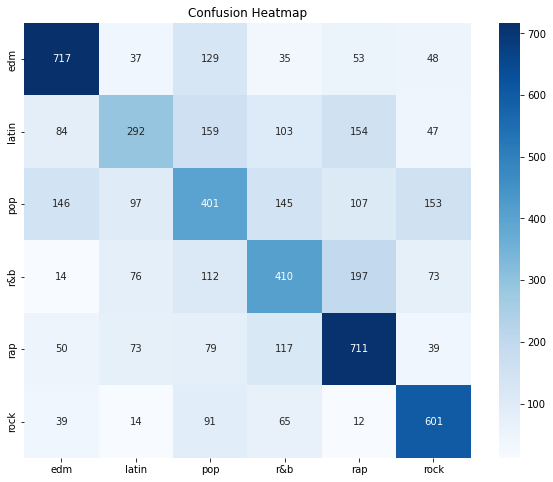

In [195]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()

In [196]:
# Acurracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, prediction, average=None)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction, average=None)

In [197]:
# Displaying the scores

print(f'============================')
print(f'Random Forest Model Results:\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')

Random Forest Model Results:

Accuracy: 0.5514084507042254 
----edm----
Recall: 0.703631010794897
Precision: 0.6828571428571428
----latin----
Recall: 0.34803337306317045
Precision: 0.49575551782682514
----pop----
Recall: 0.3822688274547188
Precision: 0.4129763130792997
----r&b----
Recall: 0.46485260770975056
Precision: 0.4685714285714286
----rap----
Recall: 0.6651075771749299
Precision: 0.5761750405186385
----rock----
Recall: 0.7311435523114356
Precision: 0.6253902185223725


### **2. SVM**

In [198]:
# Importing model

from sklearn.svm import SVC

In [199]:
# Training model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [200]:
# Evaluating model
score = model.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.4876760563380282


##### Score with Cross Validation

In [201]:
print(cross_val_score(model, X_test, y_test, cv=5))

[0.4806338  0.46566901 0.48943662 0.46214789 0.45246479]


#### Results

In [202]:
prediction = model.predict(X_test)

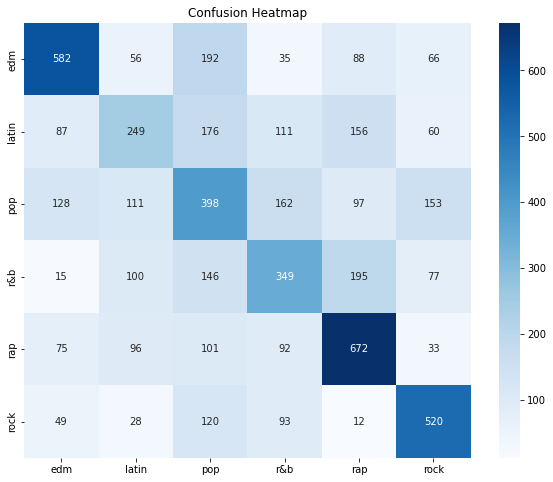

In [203]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()

In [204]:
# Acurracy 
accuracy = accuracy_score(y_test, prediction)

# Recall
recall = recall_score(y_test, prediction, average=None)

# Precision
precision = precision_score(y_test, prediction, average=None)

In [205]:
# Displaying the scores

print(f'============================')
print(f'SVM Model Results:\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')

SVM Model Results:

Accuracy: 0.4876760563380282 
----edm----
Recall: 0.5711481844946026
Precision: 0.6217948717948718
----latin----
Recall: 0.2967818831942789
Precision: 0.3890625
----pop----
Recall: 0.3794089609151573
Precision: 0.35127978817299205
----r&b----
Recall: 0.3956916099773243
Precision: 0.4144893111638955
----rap----
Recall: 0.6286248830682881
Precision: 0.5508196721311476
----rock----
Recall: 0.6326034063260341
Precision: 0.5720572057205721


### **3. MLP**

In [206]:
# Importing model

from sklearn.neural_network import MLPClassifier

In [207]:
# Training model
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(X_train, y_train)

/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [208]:
# Evaluating model
score = model.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.5176056338028169


##### Score with Cross Validation

In [209]:
print(cross_val_score(model, X_test, y_test, cv=5))

/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.49383803 0.47711268 0.50264085 0.46919014 0.47887324]


/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Results

In [210]:
prediction = model.predict(X_test)

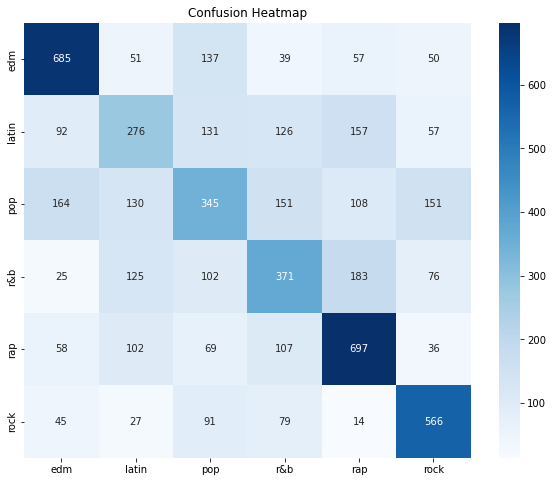

In [211]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()

In [212]:
# Acurracy 
accuracy = accuracy_score(y_test, prediction)

# Recall
recall = recall_score(y_test, prediction, average=None)

# Precision
precision = precision_score(y_test, prediction, average=None)

In [213]:
# Displaying the scores

print(f'============================')
print(f'MLP Model Results:\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')

MLP Model Results:

Accuracy: 0.5176056338028169 
----edm----
Recall: 0.6722276741903828
Precision: 0.6407857811038353
----latin----
Recall: 0.3289630512514899
Precision: 0.3881856540084388
----pop----
Recall: 0.328884652049571
Precision: 0.3942857142857143
----r&b----
Recall: 0.42063492063492064
Precision: 0.424971363115693
----rap----
Recall: 0.6520112254443405
Precision: 0.5731907894736842
----rock----
Recall: 0.6885644768856448
Precision: 0.6047008547008547


## Enhancing the models

#### PCA

In [214]:
# Importing PCA
from sklearn.decomposition import PCA

In [215]:
# Applying PCA to the dataset
pca = PCA()
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [216]:
# Displaying the results
X_reduced

array([[-0.2948561 , -0.11818618,  0.43991921, ..., -0.0274236 ,
        -0.03191669,  0.01670357],
       [-0.38293279, -0.38178249, -0.10956417, ...,  0.06903801,
         0.0101947 ,  0.04342925],
       [ 0.23679839, -0.10069777,  0.13093216, ..., -0.13030771,
        -0.00684861, -0.02257461],
       ...,
       [ 0.31029984,  0.93671331, -0.17528255, ..., -0.14440809,
        -0.02687636,  0.02068945],
       [ 0.40788599,  0.14705614,  0.08617855, ..., -0.01792132,
        -0.15472252, -0.05114422],
       [ 0.32602802,  0.09315195, -0.07921654, ...,  0.03139799,
        -0.01666805, -0.00660299]])

In [217]:
# Checking the size
X_reduced.shape

(28396, 9)

In [218]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

In [219]:
# Showing data
print(f'Training set:')
print(f'Features: {X_train.shape} | Target: {y_train.shape}' )
print(f'=============================================')
print(f'Testing set:')
print(f'Features: {X_test.shape} | Target: {y_test.shape}' )

Training set:
Features: (22716, 9) | Target: (22716,)
Testing set:
Features: (5680, 9) | Target: (5680,)


### Tuning hyperparameters on each model using GridSearchCV

In [220]:
# Importing the GridSearchCV

from sklearn.model_selection import GridSearchCV

#### **1.Random Forest**

In [230]:
# Setting the param grid

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, None], 
    'max_leaf_nodes': [3, 6, 9, None], 
} 

In [233]:
# Applying the Grid Search

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, n_jobs=6) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_features='sqrt', n_estimators=150)


In [234]:
model_grid = RandomForestClassifier(max_features='sqrt', n_estimators=150)
model_grid.fit(X_train, y_train) 
# Evaluating model
score = model_grid.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.5313380281690141


In [235]:
# Prediction
prediction = model_grid.predict(X_test)
# Acurracy 
accuracy = accuracy_score(y_test, prediction)
# Recall
recall = recall_score(y_test, prediction, average=None)
# Precision
precision = precision_score(y_test, prediction, average=None)

# Displaying the scores
print(f'============================')
print(f'Random Forest Model Results: with Enhancing\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')


Random Forest Model Results: with Enhancing

Accuracy: 0.5313380281690141 
----edm----
Recall: 0.6430769230769231
Precision: 0.6346153846153846
----latin----
Recall: 0.3353221957040573
Precision: 0.49040139616055844
----pop----
Recall: 0.3824975417895772
Precision: 0.4018595041322314
----r&b----
Recall: 0.44704570791527315
Precision: 0.46039035591274396
----rap----
Recall: 0.6771799628942486
Precision: 0.5707584050039093
----rock----
Recall: 0.6742857142857143
Precision: 0.5894105894105894


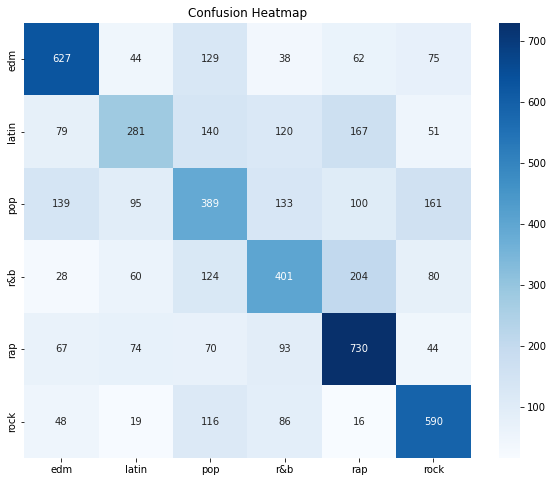

In [236]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()

#### **2.SVC**

In [237]:
# Setting the param grid

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [239]:
# Applying the Grid Search

grid_search = GridSearchCV(SVC(), 
                           param_grid=param_grid, n_jobs=6) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

SVC(C=100, gamma=1)


In [240]:
model_grid = SVC(C=100, gamma=1)
model_grid.fit(X_train, y_train) 
# Evaluating model
score = model_grid.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.5177816901408451


In [241]:
# Prediction
prediction = model_grid.predict(X_test)
# Acurracy 
accuracy = accuracy_score(y_test, prediction)
# Recall
recall = recall_score(y_test, prediction, average=None)
# Precision
precision = precision_score(y_test, prediction, average=None)

# Displaying the scores
print(f'============================')
print(f'SVC Model Results: with Enhancing\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')


SVC Model Results: with Enhancing

Accuracy: 0.5177816901408451 
----edm----
Recall: 0.6276923076923077
Precision: 0.6181818181818182
----latin----
Recall: 0.28162291169451076
Precision: 0.466403162055336
----pop----
Recall: 0.40216322517207476
Precision: 0.3787037037037037
----r&b----
Recall: 0.4169453734671126
Precision: 0.43538998835855647
----rap----
Recall: 0.6558441558441559
Precision: 0.5584518167456556
----rock----
Recall: 0.6891428571428572
Precision: 0.6159346271705822


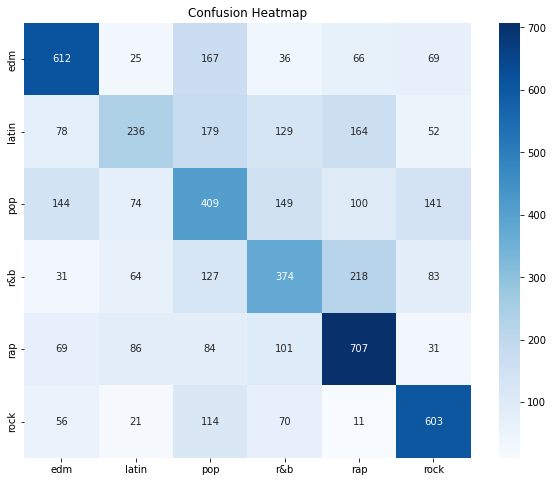

In [242]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()

#### **3.MLP**

In [243]:
# Setting the param grid

param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [244]:
# Applying the Grid Search

grid_search = GridSearchCV(MLPClassifier(), 
                           param_grid=param_grid, n_jobs=6) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francisco/anaconda3/li

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10))


/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [245]:
model_grid = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10))
model_grid.fit(X_train, y_train) 
# Evaluating model
score = model_grid.score(X_test, y_test)
print('===============================')
print(f'The total score was: {score}')
print('===============================')

The total score was: 0.5232394366197183


/home/francisco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [246]:
# Prediction
prediction = model_grid.predict(X_test)
# Acurracy 
accuracy = accuracy_score(y_test, prediction)
# Recall
recall = recall_score(y_test, prediction, average=None)
# Precision
precision = precision_score(y_test, prediction, average=None)

# Displaying the scores
print(f'============================')
print(f'MLP Model Results: with Enhancing\n')
print(f'Accuracy: {accuracy} ')

for i, genre in enumerate(label_encoder.classes_):
    print(f'----{genre}----')
    print(f'Recall: {recall[i]}')
    print(f'Precision: {precision[i]}')
print(f'============================')


MLP Model Results: with Enhancing

Accuracy: 0.5232394366197183 
----edm----
Recall: 0.6102564102564103
Precision: 0.6611111111111111
----latin----
Recall: 0.24224343675417662
Precision: 0.5178571428571429
----pop----
Recall: 0.3854473942969518
Precision: 0.38811881188118813
----r&b----
Recall: 0.44704570791527315
Precision: 0.42344244984160506
----rap----
Recall: 0.6846011131725418
Precision: 0.5676923076923077
----rock----
Recall: 0.7348571428571429
Precision: 0.5685234305923961


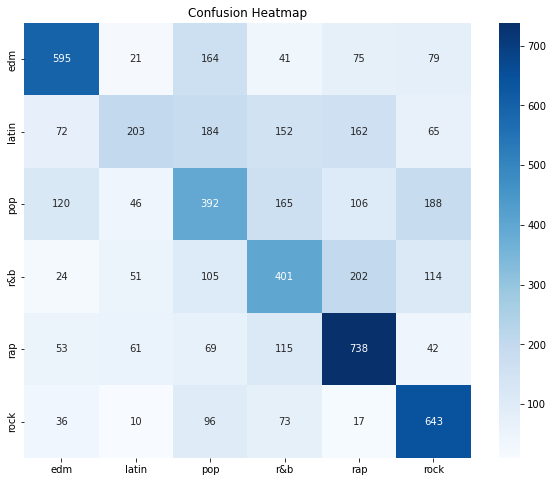

In [247]:
# Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Heatmap')
plt.show()